Tensorflow Documentation:

https://www.tensorflow.org/guide/data

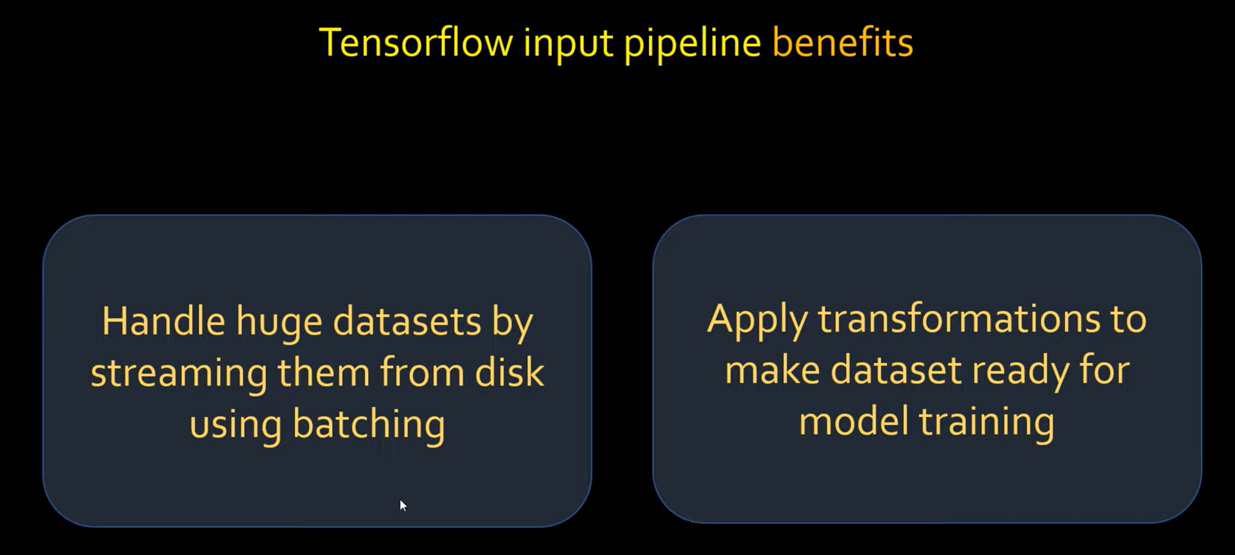

In [ ]:
import tensorflow as tf


In [ ]:
daily_sales_number = [21, 22, -108, 31, -1, 32, 34, 31] # there are some data errors in the python array. Sales number cannot be negative

In [ ]:
# buliding tf dataset from python list

tf_data = tf.data.Dataset.from_tensor_slices(daily_sales_number)
tf_data

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [ ]:
for sales in tf_data:
  print(sales)

tf.Tensor(21, shape=(), dtype=int32)
tf.Tensor(22, shape=(), dtype=int32)
tf.Tensor(-108, shape=(), dtype=int32)
tf.Tensor(31, shape=(), dtype=int32)
tf.Tensor(-1, shape=(), dtype=int32)
tf.Tensor(32, shape=(), dtype=int32)
tf.Tensor(34, shape=(), dtype=int32)
tf.Tensor(31, shape=(), dtype=int32)


In [ ]:
# convert tensor object to numpy
for sales in tf_data:
  print(sales.numpy())

21
22
-108
31
-1
32
34
31


In [ ]:
# directly read it as numpy array
for sales in tf_data.as_numpy_iterator():
  print(sales)

21
22
-108
31
-1
32
34
31


In [ ]:
# head() function in tf
for sales in tf_data.take(5):
  print(sales)

tf.Tensor(21, shape=(), dtype=int32)
tf.Tensor(22, shape=(), dtype=int32)
tf.Tensor(-108, shape=(), dtype=int32)
tf.Tensor(31, shape=(), dtype=int32)
tf.Tensor(-1, shape=(), dtype=int32)


Transformations

In [ ]:
# filter to remove negative sales number

@tf.function
def remove_negative_sales(x):
  return x>0

tf_dataset = tf_data.filter(remove_negative_sales)
print(list(tf_dataset.as_numpy_iterator()))
list(tf_dataset), type(tf_dataset)

[21, 22, 31, 32, 34, 31]


([<tf.Tensor: shape=(), dtype=int32, numpy=21>,
  <tf.Tensor: shape=(), dtype=int32, numpy=22>,
  <tf.Tensor: shape=(), dtype=int32, numpy=31>,
  <tf.Tensor: shape=(), dtype=int32, numpy=32>,
  <tf.Tensor: shape=(), dtype=int32, numpy=34>,
  <tf.Tensor: shape=(), dtype=int32, numpy=31>],
 tensorflow.python.data.ops.filter_op.FilterDataset)

In [ ]:
# convert USD to INR currency
tf_data_INR = tf_dataset.map(lambda x: x*75)
print(list(tf_data_INR.as_numpy_iterator()))
list(tf_data_INR)

[1575, 1650, 2325, 2400, 2550, 2325]


[<tf.Tensor: shape=(), dtype=int32, numpy=1575>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1650>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2325>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2400>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2550>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2325>]

In [ ]:
# randomly shuffle the elements esp when doing image data analytics
tf_shuffled = tf_data_INR.shuffle(buffer_size=3)
list(tf_shuffled)

[<tf.Tensor: shape=(), dtype=int32, numpy=1575>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2325>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1650>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2550>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2400>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2325>]

How shuffle() works with buffer size?

https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset

In [ ]:
# Batching - batching the training sample and distributing them on multi GPU environment

tf_batched = tf_shuffled.batch(batch_size=2)
list(tf_batched)

[<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1650, 2325], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2400, 1575], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2550, 2325], dtype=int32)>]

Perform all of the above operations in one shot

In [ ]:
tensor_data = tf.data.Dataset.from_tensor_slices(daily_sales_number)
tensor_data_new = tensor_data.filter(remove_negative_sales).map(lambda x: x*75).shuffle(2).batch(2)
list(tensor_data_new)

[<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1650, 2325], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1575, 2400], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2550, 2325], dtype=int32)>]

Images Data

In [ ]:

images_dataset = tf.data.Dataset.list_files('/content/drive/Othercomputers/My Laptop/syr_ads_deep_learning/labs/datasets/tf_input_pipeline_images/*/*', 
                                            shuffle=False)

In [ ]:
# it has stored the image file path; not read it
list(images_dataset.take(5).as_numpy_iterator())

[b'/content/drive/Othercomputers/My Laptop/syr_ads_deep_learning/labs/datasets/tf_input_pipeline_images/cat/20 Reasons Why Cats Make the Best Pets....jpg',
 b'/content/drive/Othercomputers/My Laptop/syr_ads_deep_learning/labs/datasets/tf_input_pipeline_images/cat/7 Foods Your Cat Can_t Eat.jpg',
 b'/content/drive/Othercomputers/My Laptop/syr_ads_deep_learning/labs/datasets/tf_input_pipeline_images/cat/A cat appears to have caught the....jpg',
 b'/content/drive/Othercomputers/My Laptop/syr_ads_deep_learning/labs/datasets/tf_input_pipeline_images/cat/Adopt-A-Cat Month\xc2\xae - American Humane....jpg',
 b'/content/drive/Othercomputers/My Laptop/syr_ads_deep_learning/labs/datasets/tf_input_pipeline_images/cat/All About Your Cat_s Tongue.jpg']

In [ ]:
# shuffle
images_dataset = images_dataset.shuffle(200)

In [ ]:
class_names = ['cat', 'dog']

In [ ]:
# how many images are in the dataset
image_count = len(images_dataset)
image_count

130

In [ ]:
traing_size = int(image_count*0.8) # 80% of the images for training
train_ds = images_dataset.take(traing_size)
test_ds = images_dataset.skip(traing_size) # 80% of the images will be skipped

(len(train_ds), len(test_ds))

(104, 26)

Retrieving the class names from the path - creating the labels for the model

In [ ]:
image_path = '/content/drive/Othercomputers/My Laptop/syr_ads_deep_learning/labs/datasets/tf_input_pipeline_images/cat/7 Foods Your Cat Can_t Eat.jpg'
image_path.split('/')[-2]

'cat'

In [ ]:
def get_labels(image_tf):
  return tf.strings.split(image_tf, '/')[-2]

In [ ]:
def load_images(image_tf):
  label = tf.strings.split(image_tf, '/')[-2]

  img = tf.io.read_file(image_tf)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, [128, 128]) # since every image is of different size, making all of them the same shape

  return (img, label)

In [ ]:
train_labels = train_ds.map(get_labels)
list(train_labels.take(5))

[<tf.Tensor: shape=(), dtype=string, numpy=b'dog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'dog'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'cat'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'cat'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'dog'>]

In [ ]:
train_img_labels = train_ds.map(load_images)
for img, label in train_img_labels.take(1):
  print(img)
  print(label)

tf.Tensor(
[[[ 39.         22.         12.       ]
  [ 41.40625    22.703125    9.296875 ]
  [ 74.14844    52.148438   38.148438 ]
  ...
  [171.        148.        130.       ]
  [169.67566   147.67566   126.67566  ]
  [168.        146.        125.       ]]

 [[ 39.         22.         12.       ]
  [ 42.109375   23.40625    10.       ]
  [ 75.22656    53.226562   39.226562 ]
  ...
  [171.        148.        130.       ]
  [168.62073   146.62073   125.62073  ]
  [165.88281   143.88281   122.88281  ]]

 [[ 39.         22.         12.       ]
  [ 42.51648    23.813354   10.4071045]
  [ 76.33826    54.338257   40.338257 ]
  ...
  [170.80469   147.80469   129.80469  ]
  [167.70312   145.70312   124.703125 ]
  [164.04578   142.04578   121.04578  ]]

 ...

 [[100.28235    82.328125   69.46875  ]
  [103.639404   85.69739    72.71301  ]
  [104.921875   87.08362    73.03674  ]
  ...
  [191.84778   187.2384    183.04309  ]
  [ 89.9314     81.9314     78.9314   ]
  [216.26562   208.26562   205.26

Scaling the images

In [ ]:
def scale(image, label):
  return (image/255, label)

In [ ]:
train_ds_scaled_imgs = train_img_labels.map(scale)
for img, lable in train_ds_scaled_imgs.take(1):
  print(img.numpy())
  print(label)

[[[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 ...

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
